In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.ndimage.filters import gaussian_filter
from mpl_toolkits.mplot3d import Axes3D 
sns.set()

In [370]:
def make_heatmap(df):
    df_temp = df
    df = df_temp.pivot("decay", "sigma", "iteration")

    df = gaussian_filter(df, sigma=1)

    ax = sns.heatmap(df, cmap='rainbow', 
                     center = 800)
    ax.set(xlabel="Spread of pheromones (sigma)", ylabel="Decay of pheromone", title="Time it takes the ants to find and return all food")
    plt.show()

## Heatmap of a very high pheromone strength (value = 15)
### As we can see, the time it takes to find all the food resources is much higher when the decay is higher and (slightly) higher when the spread of pheromones is low.

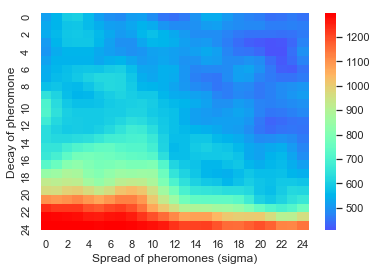

In [369]:
df = pd.read_pickle("./df_heatmap4.pkl")
make_heatmap(df)

## Heatmap of a very low pheromone strength (value = 1)
### There seems to be a transition, where a high decay leads to a more efficient model, in comparison to high pheromone strength. Best solutions were found with sigma somewhere in the middle.

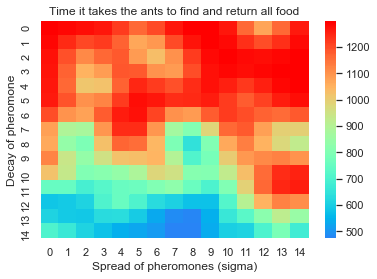

In [371]:
df = pd.read_pickle("./df_heatmap10.pkl")
make_heatmap(df)

In [373]:
plt.savefig("heatmap1")

<Figure size 432x288 with 0 Axes>

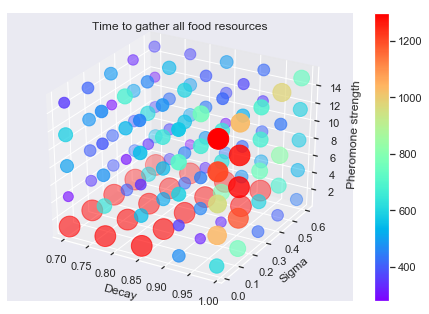

In [323]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_pickle("./df_heatmap7.pkl")

x = df.decay
y = df.sigma
z = df.strength
values = df.iteration
value = []
for i in values:
    value.append((max(values) / i))

value = pd.DataFrame(value)
value = value.T.squeeze() 

def scatter3d(x,y,z, cs, colorsMap='rainbow'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs), s=values/3)
    ax.set_xlabel("Decay")
    ax.set_ylabel("Sigma")
    ax.set_zlabel("Pheromone strength")
    ax.set_title("Time to gather all food resources")
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

scatter3d(x, y, z, values)